<a href="https://colab.research.google.com/github/hao-hao-hao/notebooks/blob/master/tfl_camera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TFL Camera

In [ ]:
# Install dependencies
!pip install -r https://raw.githubusercontent.com/sporule/distance-london/master/counter/requirements.txt

In [17]:
# Import dependencies
%matplotlib inline 
import requests
from imageai.Detection import ObjectDetection
from matplotlib import pyplot as plt
import time
import os
import datetime
import json
import numpy as np
import cv2
import wget

In [3]:
#setting the api and model address
tfl_api = 'https://api.tfl.gov.uk/Place/Type/JamCam'
model_url='https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo.h5'

In [ ]:
# Loading the model
detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
model_path = os.getenv('model_path', 'yolo.h5')
while not os.path.exists(model_path):
    wget.download('https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo.h5',out=model_path)
detector.setModelPath(model_path)
detector.loadModel()
# Detect Human Only
custom_objects = detector.CustomObjects(person=True)

In [10]:
'''
get cameras address from TFL
'''
def get_cameras(api):
    r = requests.get(api)
    if r.status_code != 200:
        return []
    results = r.json()
    cameras = []
    for result in results:
        image_url = [ property for property in result['additionalProperties'] if property['key'].lower()=='imageurl'][0]['value']
        if len(image_url)>2:
            cameras.append({'name': image_url.split('/')[-1].split('.jpg')[0], 'image':image_url, 'position':[
                result['lat'], result['lon']], 'street':result['commonName']})
    return cameras

In [41]:
cameras = get_cameras(tfl_api)
cameras[200]

{'image': 'https://s3-eu-west-1.amazonaws.com/jamcams.tfl.gov.uk/00001.09606.jpg',
 'name': '00001.09606',
 'position': [51.56, -0.11566],
 'street': 'Seven Sisters Rd by Sussex Way'}

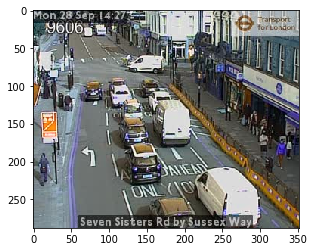

In [34]:
# Pick the Image
res = requests.get(cameras[200]['image'], stream=True).raw
image = np.asarray(bytearray(res.read()), dtype='uint8')
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
plt.imshow(image, interpolation='nearest')
plt.show()

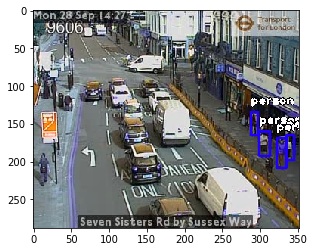

[{'box_points': [288, 134, 297, 165],
  'name': 'person',
  'percentage_probability': 66.39583110809326},
 {'box_points': [299, 160, 313, 192],
  'name': 'person',
  'percentage_probability': 83.36868286132812},
 {'box_points': [335, 165, 345, 198],
  'name': 'person',
  'percentage_probability': 89.83316421508789},
 {'box_points': [322, 169, 335, 208],
  'name': 'person',
  'percentage_probability': 96.11887335777283}]

In [39]:
# Detect Human
new_image, detections = detector.detectCustomObjectsFromImage(custom_objects=custom_objects, input_image=image, input_type='array', output_type='array', minimum_percentage_probability=50)
plt.imshow(new_image, interpolation='nearest')
plt.show()
detections